In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
IQR=data['age'].quantile(0.75)-data['age'].quantile(0.25)
IQR

24.0

In [ ]:
lowerBound=data['age'].quantile(0.25)-(1.5*IQR)
lowerBound

-9.0

In [ ]:
upperBound=data['age'].quantile(0.75)+(1.5*IQR)
upperBound

87.0

{'whiskers': [<matplotlib.lines.Line2D at 0x790075b54f10>,
 'caps': [<matplotlib.lines.Line2D at 0x790075b55450>,
 'boxes': [<matplotlib.lines.Line2D at 0x790075b54c70>],
 'medians': [<matplotlib.lines.Line2D at 0x790075b55990>],
 'fliers': [<matplotlib.lines.Line2D at 0x790075b55c30>],
 'means': []}

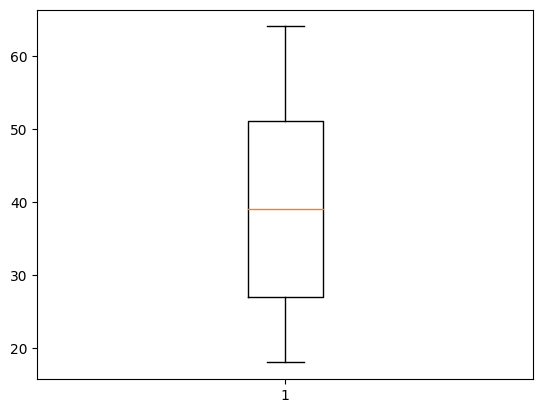

In [ ]:
plt.boxplot(data['age'])

<Axes: ylabel='age'>

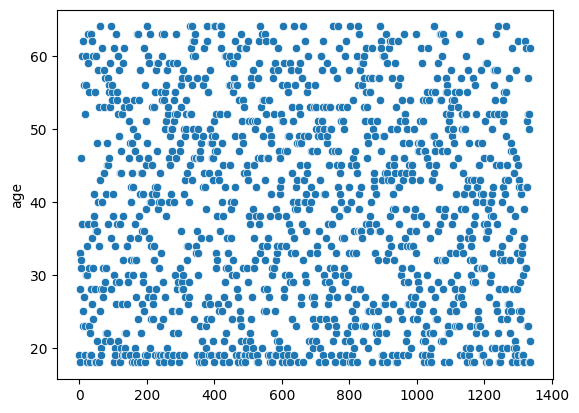

In [ ]:
import seaborn as sns
sns.scatterplot(data['age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
lable_encoder=LabelEncoder()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['sex']=lable_encoder.fit_transform(data['sex'])
data['smoker']=lable_encoder.fit_transform(data['smoker'])
data['region']=lable_encoder.fit_transform(data['region'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
x=data.drop(columns=['charges'],axis=1)
y=data['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
y.shape

(1338,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
x_train.shape

(1070, 6)

In [ ]:
y_train.shape

(268, 6)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()


In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
y_p=model.predict([[21	,0	,25.800,	0,	0,	3]])

In [ ]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc